Expects inputs deriving from a partial run of the main face-rhythm notebook. 

Expects the following inputs:
1. path to a .npy file containing the initial dot coordinates
2. path to videos
3. path to a reference config file containing all the desired settings
4. path to output directory

- The `dot_coords.npy` file should contain a single array of shape `(n_points, 2)` where `[:,0] = x coords`, and `[:,1] = y coords` 
    - You can convert an .nwb file containing desired dot coordinates into this file using the `convert_nwb_to_dotCoordsNpy.py` script (this is an option within this script)
- The reference config file can/should come from a local run of face-rhythm


This script will:
1. make a new config fig with the paths taken from the old config file for the following: .nwb, videos, config file, and outputs

In [26]:
from IPython.display import display, HTML
display(HTML("<style>.container {width:95% !important; }</style>"))

In [27]:
from pathlib import Path
import yaml

In [28]:
path_configTemplate = '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/face_rhythm_20220513_movie3/configs/config_run.yaml'
path_oldNWB = '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/face_rhythm_20220513_movie3/data/sessionrun.nwb'

In [29]:
def load_configFile(path):
    import yaml
    with open(path) as f:
        return yaml.safe_load(f)

In [30]:
def dump_nwb(nwb_path):
    """
    Print out nwb contents

    Args:
        nwb_path (str): path to the nwb file

    Returns:
    """
    import pynwb
    with pynwb.NWBHDF5IO(nwb_path, 'r') as io:
        nwbfile = io.read()
        for interface in nwbfile.processing['Face Rhythm'].data_interfaces:
            print(interface)
            time_series_list = list(nwbfile.processing['Face Rhythm'][interface].time_series.keys())
            for ii, time_series in enumerate(time_series_list):
                data_tmp = nwbfile.processing['Face Rhythm'][interface][time_series].data
                print(f"     {time_series}:    {data_tmp.shape}   ,  {data_tmp.dtype}   ,   {round((data_tmp.size * data_tmp.dtype.itemsize)/1000000000, 6)} GB")


In [31]:
configTemplate = load_configFile(path_configTemplate)

In [32]:
dir_FRproject = '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/batchRun'
dir_videos = '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/camera/'
nameRun = '_batch'
fileName_strMatch = 'movie3'

path_configNew = str(Path(dir_FRproject) / 'configs' / ('config_'+nameRun+'.yaml'))

In [33]:
%load_ext autoreload
%autoreload 2
from face_rhythm.util import helpers, setup

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
helpers.load_config(config_filepath)

{'CDR': {},
 'CQT': {},
 'Clean': {},
 'Comps': {},
 'General': {'multisession': False,
  'remote': True,
  'run_name': '_batch',
  'trials': False},
 'Optic': {},
 'PCA': {},
 'Paths': {'config': '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/batchRun/configs/config__batch.yaml',
  'data': '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/batchRun/data',
  'project': '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/batchRun',
  'video': '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/camera',
  'viz': '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/batchRun/viz'},
 'ROI': {},
 'TCA': {'dir_positional': '/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/batchRun/viz/positional',
  'dir_spectral': '/media/rich/bigS

In [ ]:
# project_path     = Path(r'/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/face_rhythm_20220513_movie3/').resolve() # often Path.cwd().resolve() is useful
# video_path       = Path(r'/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/2022_05_13_AEG21').resolve() 
# run_name         = 'batchCopy'

config_filepath = setup.setup_project(
    Path(dir_FRproject),
    Path(dir_videos),
    nameRun,
    overwrite_config=False,
    remote=True,
    trials=configTemplate['General']['trials'],
    multisession=configTemplate['General']['multisession'],
    update_paths=True
)

In [41]:
%load_ext autoreload
%autoreload 2
from face_rhythm.util import helpers, setup
# IMPORT VIDEOS
# See the docs for more information on video path setting
# https://face-rhythm.readthedocs.io/

config = helpers.load_config(config_filepath)
config['Video']['file_strMatch'] = fileName_strMatch # Set to '' to grab all vids in video_path. Set to 'session_prefix' if multisession.
config['Video']['sort_filenames']  = configTemplate['Video']['sort_filenames']
config['Video']['print_filenames'] = configTemplate['Video']['print_filenames']
config['General']['overwrite_nwbs'] = False
helpers.save_config(config, config_filepath)

setup.prepare_videos(config_filepath)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Current Session: session
number of videos: 1
number of frames per video (roughly): 983170
number of frames in ALL videos (roughly): 983170

 ['/media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/camera/20220513AEG21_movie32022-05-13T12_41_57.avi']
Sampling rate pulled from video file metadata:   164.0 frames per second


In [42]:
# %matplotlib notebook

from face_rhythm.util import helpers, set_roi

# Select Bounding ROI for this analysis
# This block of code will pop up a little GUI. Click around the
# region of the face that you want to include in the analysis.
# When you are done, click the 'Confirm ROI' button

config = helpers.load_config(config_filepath)
config['ROI']['session_to_set'] = 0 # 0 indexed. Chooses the session to use
config['ROI']['vid_to_set'] = 0 # 0 indexed. Sets the video to use to make an image
config['ROI']['frame_to_set'] = 1 # 0 indexed. Sets the frame number to use to make an image

config['ROI']['load_from_file'] = True # if you want to use the ROI from a previous session (different .nwb file), set to True and define path below
config['ROI']['path_to_oldNWB'] = path_oldNWB # if 'load_from_file' is true, define path to that .nwb file here
helpers.save_config(config, config_filepath)

frame, pts_all = set_roi.get_roi(config_filepath)

<IPython.core.display.Javascript object>


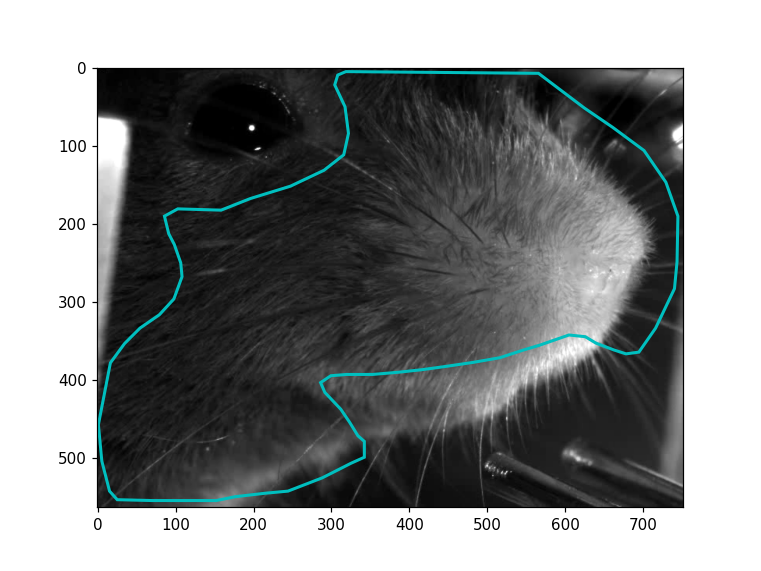

dict_keys(['frames_per_video', 'frames_total', 'name', 'num_vids', 'nwb', 'vid_lens', 'videos'])
Saving bbox_subframe_displacement in Group Original Points
Saving pts_displacement in Group Original Points
Saving pts_x_displacement in Group Original Points
Saving pts_y_displacement in Group Original Points
Saving mask_frame_displacement in Group Original Points


In [43]:
# Don't run this until you're done selecting
set_roi.save_roi(config_filepath, frame, pts_all)

In [52]:
%load_ext autoreload
%autoreload 2
from face_rhythm.optic_flow import optic_flow
import cv2


config = helpers.load_config(config_filepath)

config['Optic']['vidNums_toUse'] = list(range(config['General']['sessions'][0]['num_vids'])) ## 0 indexing. Use this line of code to run all the videos in a particular session

config['Optic'] = configTemplate['Optic']
config['Optic']['spacing'] = 99 ## This is the distance between points in the grid (both in x and y dims)
config['Optic']['showVideo_pref'] = True ## USE THIS TO TUNE PARAMETERS! Much faster when video is off. If 'remote' option chosen (from first cell block), video will be saved as file in project folder.

config['Video']['save_video'] = False # Whether to save the demo video (true for remote users when showvideo is true)
# config['Video']['demo_len'] = 1000 # used when remote users when show_video==True

helpers.save_config(config, config_filepath)

optic_flow.optic_workflow(config_filepath)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
== Beginning optic flow computation ==
number of points: 23
Optic Flow Set Up. Elapsed time: 0.89 seconds
saving to file /media/rich/bigSSD/analysis_data/face_rhythm_paper/fig_4/2pRAM_motor_mapping/AEG21/2022_05_13/batchRun/viz/optic_test.avi

 Calculating displacement field: video # 1/1


100%|██████████████████████████████████| 983170/983170 [20:13<00:00, 810.25it/s]


video time elapsed:. Elapsed time: 20.31 minutes
Capture rate: 806.633 fps
Displacements computed. Elapsed time: 20.32 minutes
Saving displacements in Group Optic Flow
Saving positions_recursive in Group Optic Flow
Saving color_tuples in Group Optic Flow
Saving pointInds_toUse in Group Optic Flow
Session session completed. Elapsed time: 20.45 minutes
Total number of frames: 983170 frames
Average frames per second: 801.32 fps
total elapsed time. Elapsed time: 20.45 minutes
== End Optic Flow Computation ==


In [53]:
from face_rhythm.optic_flow import clean_results

config = helpers.load_config(config_filepath)
config['Clean'] = configTemplate['Clean']
helpers.save_config(config, config_filepath)

clean_results.clean_workflow(config_filepath)


== Beginning outlier removal ==
== Loading displacements ==
== Cleaning displacements ==
Saving positions_cleanup in Group Optic Flow
Session session completed. Elapsed time: 9.77 seconds
total elapsed time. Elapsed time: 9.78 seconds
== End outlier removal ==


In [56]:
from face_rhythm.optic_flow import conv_dim_reduce

config = helpers.load_config(config_filepath)
config['CDR'] = configTemplate['CDR']
config['CDR']['display_points'] = False # checkout the dots and overlayed filter

helpers.save_config(config, config_filepath)

conv_dim_reduce.conv_dim_reduce_workflow(config_filepath)

helpers.save_config(config, config_filepath)


== Beginning convolutional dimensionality reduction ==
number of points: 953
Points spaced out. Elapsed time: 0.08 seconds


creating kernel:   0%|          | 0/3021 [00:00<?, ?it/s]

IndexError: index 23 is out of bounds for axis 0 with size 23

/media/rich/Home_Linux_partition/github_repos/face-rhythm/face_rhythm/analysis/spectral_analysis.py:183: FutureWarning: Pass fmin=1.2 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  freqs_Sxx = librosa.cqt_frequencies(n_bins, fmin,


<IPython.core.display.Javascript object>


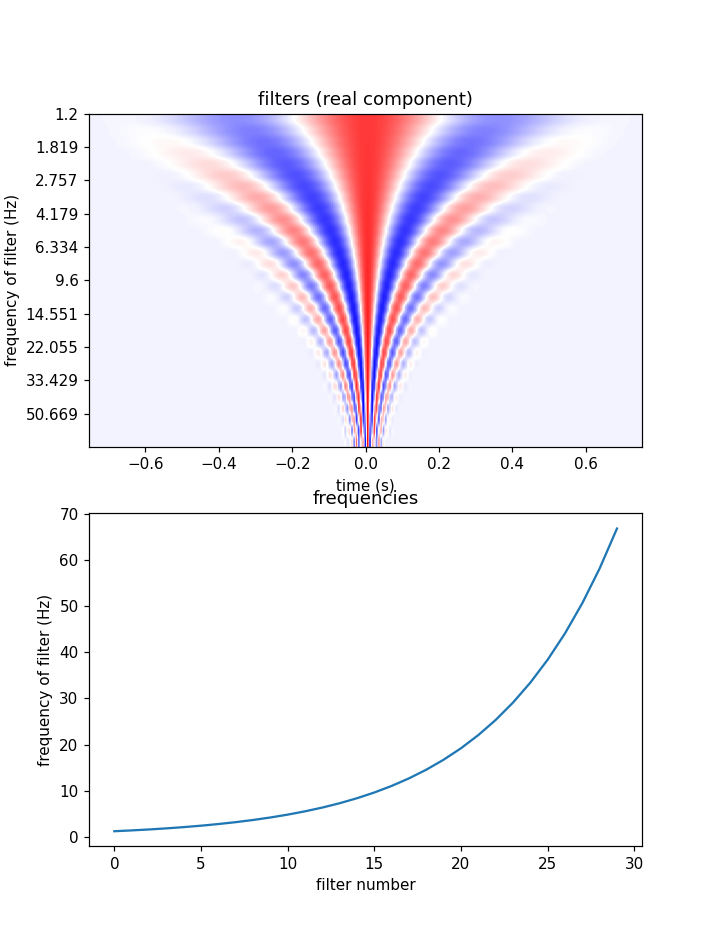

octaves: 6.09451759878429 octaves
bins_per_octave: 5.0 bins/octave
minimum frequency (fmin): 1.2 Hz
maximum frequency (fmax): 38.4 Hz
Nyquist                 : 82.0 Hz
number of frequencies   : 30 bins
Saving freqs_Sxx_all in Group CQT
Saving freqs_Sxx_toUse in Group CQT
Saving freq_idx_toUse in Group CQT


KeyError: "'positions_convDR_meanSub' not found in BehavioralTimeSeries 'Optic Flow'."

In [57]:
from face_rhythm.analysis import spectral_analysis

%matplotlib notebook

config = helpers.load_config(config_filepath)
config['CQT'] = configTemplate['CQT']

helpers.save_config(config, config_filepath)

spectral_analysis.prepare_freqs(config_filepath)

spectral_analysis.show_demo_spectrogram(config_filepath,
                        dot_toUse=500,
                        xy_toUse='x',
                        timeSeries_toUse='positions_convDR_meanSub',
                        dtype_to_estimate=config['CQT']['dtype_toUse']
)
